# Non Graded Challenge 3
- Muhammad Fadlil Ismail
- FTDS Batch 10 Phase 1

## Import Library

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score


## Load Data

In [2]:
pd.set_option.max_col_width = 50

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isna().sum().sum()

0

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## EDA


In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
num_col = list(df.columns)
num_col.remove('Class')

In [9]:
df.groupby('Class')[num_col].mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Data Preprocessing

### Split X dan y

In [10]:
X = df.drop('Class', axis=1)
y = df[['Class']]

### Split data train and data test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845, 1)
(56962, 1)


### Check and handle outliers

In [13]:
skew = []
for i in num_col:
    skew.append(abs(stats.skew(X_train[i])))
skewness_check = pd.DataFrame({'Column':num_col, 'Skewness':skew})

In [14]:
skewness_check['Normal'] = skewness_check.Skewness < 0.5
skewness_check

,Column,Skewness,Normal
0,Time,0.036393,True
1,V1,3.265521,False
2,V2,4.388835,False
3,V3,2.177192,False
4,V4,0.678647,False
5,V5,0.597176,False
6,V6,1.307185,False
7,V7,0.718525,False
8,V8,7.946789,False
9,V9,0.559878,False


Pisahkan kolom skewed dan normal :

In [15]:
skewed = list(skewness_check[skewness_check.Normal==False]['Column'])
normal = list(skewness_check[skewness_check.Normal==True]['Column'])

Cek jumlah outlier kolom skewed : 

In [16]:
jumlah_outliers = []
percent_outliers = []
lower1_lst = []
upper1_lst = []
for i in skewed:
    num = 3
    q1 = np.nanquantile(X_train[i], 0.25)
    q3 = np.nanquantile(X_train[i], 0.75)
    iqr = q3 - q1
    upper1 = q3 + num*iqr
    lower1 = q1 - num*iqr
    upper1_lst.append(upper1)
    lower1_lst.append(lower1)
    jumlah = len(X_train[(X_train[i]>upper1)|(X_train[i]<lower1)])
    jumlah_outliers.append(jumlah)
    percent = len(X_train[(X_train[i]>upper1)|(X_train[i]<lower1)])*100/len(X_train)
    percent_outliers.append(percent)

In [17]:
pd.DataFrame({'kolom':skewed, 'jumlah_outlier':jumlah_outliers, 'persen_outlier':percent_outliers, 'upper': upper1_lst, 'lower': lower1_lst})

,kolom,jumlah_outlier,persen_outlier,upper,lower
0,V1,1613,0.707937,8.019060,-7.623206
1,V2,3582,1.572121,5.009558,-4.807662
2,V3,621,0.272554,6.780392,-6.645457
3,V4,383,0.168097,5.514802,-5.620364
4,V5,1857,0.815028,4.531900,-4.613425
5,V6,4266,1.872325,3.905382,-4.274023
6,V7,2437,1.069587,3.946963,-3.930353
7,V8,9035,3.965415,1.936454,-1.818551
8,V9,886,0.388861,4.317276,-4.367123
9,V10,2567,1.126643,3.431126,-3.509506


Cek jumlah outlier kolom normal :

In [18]:
percent_outliers1 = []
jumlah_outliers1 = []
upper_lst = []
lower_lst = []
for i in normal:
    std = X_train[i].std()
    upper = X_train[i].mean() + 3*std
    lower = X_train[i].mean() - 3*std
    upper_lst.append(upper)
    lower_lst.append(lower)
    jumlah = len(X_train[(X_train[i]>upper)|(X_train[i]<lower)])
    jumlah_outliers1.append(jumlah)
    percent = len(X_train[(X_train[i]>upper)|(X_train[i]<lower)])*100/len(X_train)
    percent_outliers1.append(percent)

In [19]:
pd.DataFrame({'kolom':normal, 'jumlah_outlier':jumlah_outliers1, 'persen_outlier':percent_outliers1, 'upper':upper_lst, 'lower':lower_lst})

,kolom,jumlah_outlier,persen_outlier,upper,lower
0,Time,0,0.000000,237345.320786,-47635.009504
1,V11,552,0.242270,3.062160,-3.064067
2,V13,934,0.409928,2.984957,-2.984188
3,V15,1023,0.448989,2.744512,-2.747606
4,V18,1321,0.579780,2.517095,-2.516379
5,V19,2730,1.198183,2.443640,-2.443102
6,V22,981,0.430556,2.180846,-2.177801
7,V25,2227,0.977419,1.564571,-1.565335


tidak dilakukan handling outlier, karena dikhawatirkan akan merusak data yang sudah ada.

### Feature Scaling

Akan dilakukan scaling menggunakan standard scaler agar variance dari data pada tiap-tiap kolom tetap terjaga.

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X_train.columns))

### Feature Selection
Akan dilakukan feature selection menggunakan Principal Components Analysis. Sebelum itu akan dilakukan VIF untuk tiap-tiap kolom pada dataset untuk mengetahui sampai berapa dimensi dataset dapat direduksi.

In [28]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_scaled.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(len(X_train_scaled.columns))]

vif_data

,feature,VIF
0,Time,1.880130
1,V1,1.685694
2,V2,4.567826
3,V3,1.897973
4,V4,1.142235
5,V5,2.838683
6,V6,1.567026
7,V7,2.892043
8,V8,1.133895
9,V9,1.024710


Dari data diatas terlihat bahwa hanya satu kolom yang memiliki VIF>5. Sehingga mungkin tidak dapat dilakukan reduksi dimensi

Lakukan PCA dengan jumlah komponen = 30 :

In [40]:
pca30=PCA(n_components=30).fit(X_train_scaled)
pca30.explained_variance_ratio_

array([0.06429153, 0.05620264, 0.03501717, 0.03460452, 0.03397446,
       0.03382832, 0.03378062, 0.03371973, 0.03366153, 0.03361143,
       0.03355917, 0.03348604, 0.03343216, 0.03340329, 0.03338214,
       0.03336036, 0.03334162, 0.03332689, 0.0332921 , 0.03327667,
       0.03324482, 0.03320859, 0.03316941, 0.03312013, 0.03307422,
       0.03288223, 0.03280465, 0.03000522, 0.01054308, 0.00139525])

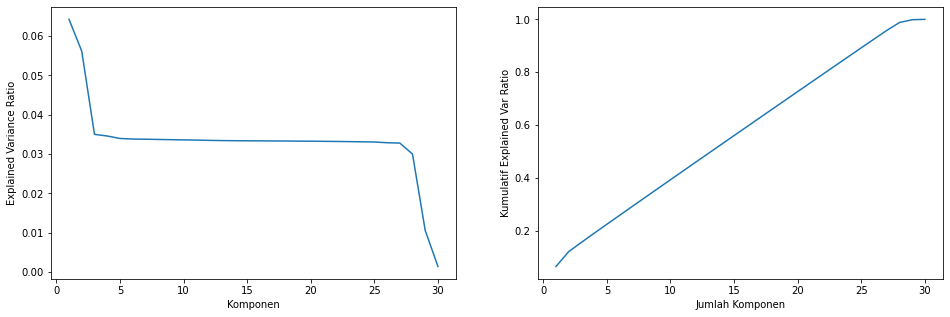

In [41]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,31),pca30.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,31),np.cumsum(pca30.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

Terlihat patahan pada 3 komponen

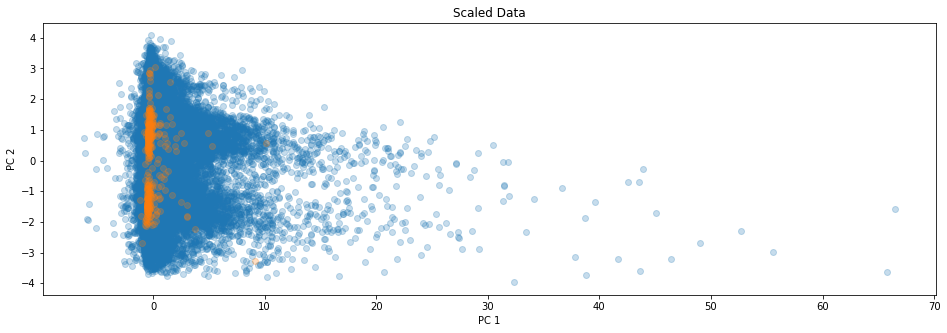

In [56]:


pca_2d=PCA(n_components=2).fit(X_train_scaled)

twod=pca_2d.transform(X_train_scaled)
gabung = pd.DataFrame(twod).join(y_train)

fig,ax=plt.subplots(ncols=1,figsize=(16,5))
plt.scatter(x=gabung[gabung.Class==0][0], y=gabung[gabung.Class==0][1], alpha=0.25)
plt.scatter(x=gabung[gabung.Class==1][0], y=gabung[gabung.Class==1][1], alpha=0.25)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Scaled Data')
plt.show()



In [48]:
pd.DataFrame(twod).join(y_train)

,0,1,Class
0,-0.415103,1.609597,0.0
1,-0.310111,1.446660,0.0
2,1.922511,-1.756499,0.0
3,0.779159,0.887657,0.0
4,-0.326018,2.527356,0.0
...,...,...,...
227840,-0.380880,1.132095,0.0
227841,-0.458411,0.205364,0.0
227842,-0.174668,1.132678,0.0
227843,-0.341026,0.952729,0.0
